# Линейная регрессия

Линейная регрессия задается в виде:

$$y_i = \sum_{j=0}^{m}w_j X_{ij} + \epsilon _i$$

где
* $\vec{y}$ - целевая
* $w$ - вектор весов
* $X$ - матрица объектов-признаков
* $\epsilon$ - случайная непрогнозируемая ошибка

Для того, чтобы линейная регрессия была линейной на нее накладывают набор условий, задаваемых теоремой Маркова-Гаусса:

* Матожидание ошибок нулевое
* Дисперсия ошибок одинакова и конечна (гомоскедастичность)
* Случайные ошибки не скоррелированны

Записывая математически:

* $\forall i: \mathbb{E}[\epsilon_i] = 0 $
* $\forall i: Var(e_i) = \sigma^2 < \inf$
* $\forall i \neq j: Cov(\epsilon_i, \epsilon_j) = 0 $


## Метод максимального правдоподобия

Метод максимального правдоподобия (MLE — maximum likelihood estimation) в математической статистике — это метод оценивания неизвестного параметра путём максимизации функции правдоподобия. 

Пологаем, что нам **известна** условная вероятность получения на выходе алгоритма МЛ величину $y$ при поданной на вход $х$. (Если множество величин не дискретно, то условная вероятность заменяется на условную плотность распределения.) Нам известно, что нам заданная обучающая выборка $(x_1, \dots , x_n)$ с ответами $(y_1, \dots, y_n)$ независимо одинаково распределена ([i.i.d.](https://cutt.ly/xvQJSU9) ). 

В силу независимости элементов выборки **вероятность** получить набор $(y_1, \dots, y_n)$ при заданых $(x_1, \dots , x_n)$ равна:

$$P(y_1, \dots, y_n|x_1, \dots , x_n) = \prod P(y_i|x_i)$$

Из эвристических соображений понятно, что, чем ближе модель к истинной, тем больше должна быть эта величина.

Воспользуемся старым трюком - [логарифмирования функции правдоподобия](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F#:~:text=%D0%9B%D0%BE%D0%B3%D0%B0%D1%80%D0%B8%D1%84%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F,-%D0%92%D0%BE%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%B8%D1%85%20%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D1%85&text=%D0%9B%D0%BE%D0%B3%D0%B0%D1%80%D0%B8%D1%84%D0%BC%20%E2%80%94%20%D0%BC%D0%BE%D0%BD%D0%BE%D1%82%D0%BE%D0%BD%D0%BD%D0%BE%20%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%2C%20%D0%BF%D0%BE%D1%8D%D1%82%D0%BE%D0%BC%D1%83,%D1%8F%D0%B2%D0%BB%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D1%81%D1%83%D0%BC%D0%BC%D0%BE%D0%B9%2C%20%D1%87%D1%82%D0%BE%20%D1%83%D0%BF%D1%80%D0%BE%D1%89%D0%B0%D0%B5%D1%82%20%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.). Логарифм — монотонно возрастающая функция, поэтому логарифм от функции достигнет максимума в той же точке, что и сама функция. С другой стороны, логарифм произведения является суммой, что упрощает дифференцирование. Поэтому для практических вычислений предпочитают использовать логарифм функции правдоподобия.

Тогда максимизацию вероятности выше можно переписать как сумму логарифмов: 

$ln\prod P(y_i|x_i) \to max$ эквивалентно $\sum_i log P(y_i|x_i) \to max$

Тогда, если у нас есть множество моделей $\alpha$ (тут эта велечина просто играет роль индекса, и модели, вообще говоря, могут иметь любую природу), нам нужно выбрать ту ($\alpha^*$), что наилучшим образом подходит к обучающей выборке. **Функцией правдоподобия** называют функцию вида:

$$W(\alpha) = \sum log p(y_i|x_i, \alpha)$$

**Метод наибольшего правдоподобия** состоит в том, что из множества моделей выбирается та, что максимизирует значение функции правдоподобия, т.е. выбирается значение параметра $\alpha^* = argmax_{\alpha}W(\alpha)$

## Минимизация эмпирического риска

Пускай задана функция потерь $L(\hat{y}, y)$, характеризующая величину отклонения ответа $\hat{y} = a(x)$ от правильного $y = y^* (x)$ на произвольном объекте $x \in X$.

**Эмпричиеский риск** - это функционал качества, характеризующий среднюю ошибку алгоритма a на выборке $X^n$.

$$Q(a, X^n) = \frac{1}{n}\sum_{i=1}^n L(a(x_i), y^*(x_i))$$

**Метод минимизация эмпирического риска** заключается в том, чтобы в заданной модели алгоритмов $A = {a: X \to Y}$ найти алгоритм, доставляющий минимальное значение функционалу эмпирического риска:

$$a = argmin_{a\in A} Q(a, X^n)$$



Метод максимизации правдоподобия [эквивалентен](https://delirium-00.livejournal.com/7035.html) минимизации эмпирического риска.


# Выбор MSE в задачах регрессии

C учетом ограничений на линейную регрессию (нормально распределена ошибка) можем записать функцию правдоподобия выборки. Это некоторое произведение плотностей, в которое подставлены значения из обучающей выборки.

Для этого необходимо использовать метод максимального правдоподобия, который даст нам параметры, которые максимизируют выбранную функцию. Мы полагаем, что велечины распределены **нормально**.

$$P(y|x, w) = \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y-w^T x)^2}{2\sigma^2})$$

Прологарифмировав функцию правдоподобия получим:

$L(w) = log \prod_i^n P(y_i|x_i, w) = \sum_{i=1}^n(-\frac{1}{2}log(2\pi \sigma^2) - \frac{y_i - w^Tx_i)^2}{2\sigma^2}) \to max$

Преобразовав, получим, что это эквивалентно минимизации:

$$\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - w^T x_i)^2 \to min$$

Что это эквивалентно минимизации MSE.


## Продифференцируем MSE


Минимизируя MSE распишем в матричном виде:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$

где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ это матрица $\large n \times m$, где каждая строка - вектор признаков

Dыведем алгоритм обучения, мы будем использовать тот факт, что квадратная функция в выпуклой функции:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Теперь мы можем найти решение (ordinary least squares, OLS):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

Линейная регрессия оказывается необычайно простой задачей оптимизации. В отличие от большинства других моделей линейная регрессия может быть решена аналитически путем применения простой формулы, дающей глобальный оптимум. Мы можем включить смещение $b$ в параметр $w$, добавив столбец из единиц к матрице $X$. Тогда наша задача предсказания состоит в том, чтобы минимизировать $y-Xw$. Поскольку это выражение имеет квадратичную форму, оно является выпуклым, и пока задача не является вырожденной (наши признаки линейно независимы), оно является строго выпуклым.

# Дилемма смещения–дисперсии



![](https://habrastorage.org/files/aa5/d0f/149/aa5d0f149838470fb997ca405c4c55a0.png)

Компромисс отклонение-дисперсия в статистике и в машинном обучении — это свойство набора моделей предсказания, когда модели с меньшим отклонением от имеющихся данных имеют более высокую дисперсию на новых данных (то есть подвержены переобучению), и наоборот. Компромисс отклонение-дисперсия — конфликт при попытке одновременно минимизировать эти два источника ошибки, которые мешают алгоритмам обучения с учителем делать обобщение за пределами тренировочного набора.

$$\large \begin{array}{rcl} \text{Err}\left(\vec{x}\right) &=& \mathbb{E}\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\ &=& \sigma^2 + f^2 + \text{Var}\left(\hat{f}\right) + \mathbb{E}\left[\hat{f}\right]^2 - 2f\mathbb{E}\left[\hat{f}\right] \\ &=& \left(f - \mathbb{E}\left[\hat{f}\right]\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \\ &=& \text{Bias}\left(\hat{f}\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \end{array}$$

# Аналитическое решение на практике


Генерируем синтетические данные: берем случайную точку на синусе и добавлять к ней шум. Таким образом получим целевую переменную. Признаком в этом случае будет координата x.



In [ ]:
import pandas as pd
import numpy as np

def generate_data(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_data(100, 250)

Визуализируем набор на графике:

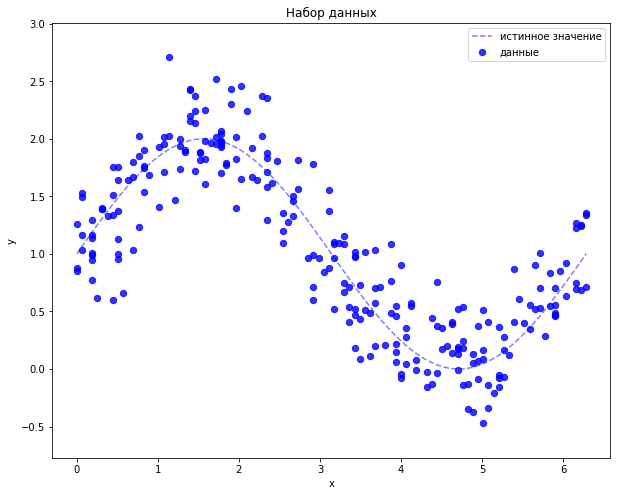

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='данные')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend()
plt.title('Набор данных')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Реализуем линейную регрессию, используя NumPy:


In [ ]:
# добавим колонку единиц к единственному столбцу признаков - смещения
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

In [ ]:
w

array([ 1.83852122, -0.26494218])

Отобразим полученное предсказание значения в зависимости от координаты:


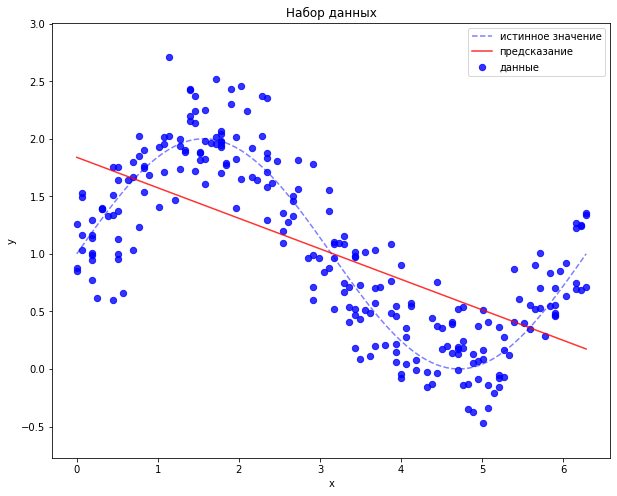

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='данные')
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='предсказание')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend()
plt.title('Набор данных')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Полиномиальная регрессия

Даже без метрик качества можно видеть, что предсказание не особо хорошо описывает набор данных. Воспользуемся методом генерации полиномиальных признаков из темы 5. В таком случае задача все еще будет решаться как и прежде, но размер пространства признаков увеличится: $w_0 +w_1 x + w_2 x^2 + ... + x_n x^p$

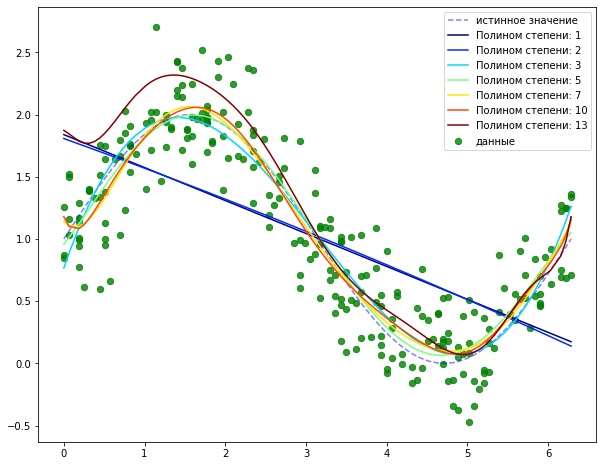

In [ ]:
# список степеней p полиномов, которые тестируются
degree_list = [1, 2, 3, 5, 7, 10, 13]

plt.figure(figsize=(10, 8)) # устанавливаем размер фигуры
cmap = plt.get_cmap('jet') # получаем цветовую палитру для линий
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))] # задает набор разных цветов для линий

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение') # отображаем данные с параметрами
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='данные')

w_list = []
err = []
for ix, degree in enumerate(degree_list): # проходимся по полиномам и строим модель на новых данных
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label=f'Полином степени: {degree}')
    plt.legend()

При увеличении степени полинома, средняя ошибка продолжает уменьшаться, хотя по идее кубический полином должен лучше всего описывать синусоидальные данные. Это явный признак переобучения, его можно заметить по визуализации даже без тестовых данных: при увеличении степени полинома выше третьей модель начинает интерполировать данные, вместо экстраполяции. Другими словами, график функции проходит точно через точки из тренировочного набора данных, причем чем выше степень полинома, тем через большее количество точек он проходит. Степень полинома отражает сложность модели. Таким образом, сложные модели, у которых степеней свободы достаточно много, могут попросту запомнить весь тренировочный набор, полностью теряя обобщающую способность. Это и есть проявление негативной стороны принципа минимизации эмпирического риска.

---
разбор получения полиномиальных признаков






In [ ]:
iks=np.random.rand(3)

In [ ]:
iks

array([0.18495809, 0.13703651, 0.38699506])

In [ ]:
iks**2

array([0.03420949, 0.01877901, 0.14976517])

In [ ]:
# возводим признаки в степень до максимальной степени полинома 3
coef = list(map(lambda n: iks**n, range(1, 3 + 1))) 
coef

[array([0.18495809, 0.13703651, 0.38699506]),
 array([0.03420949, 0.01877901, 0.14976517]),
 array([0.00632732, 0.00257341, 0.05795838])]

In [ ]:
np.array(coef).T # транспонируем чтобы степени были по столбцам  х1 - 1 столблец, х2 - 2й и тд

array([[0.18495809, 0.03420949, 0.00632732],
       [0.13703651, 0.01877901, 0.00257341],
       [0.38699506, 0.14976517, 0.05795838]])

Конец разбора


---



Рассмотрим амплитуду параметров полиномиальной регрессии. При увеличении степени полинома, размах значений коэффициентов растет почти экспоненциально, визуализируем:


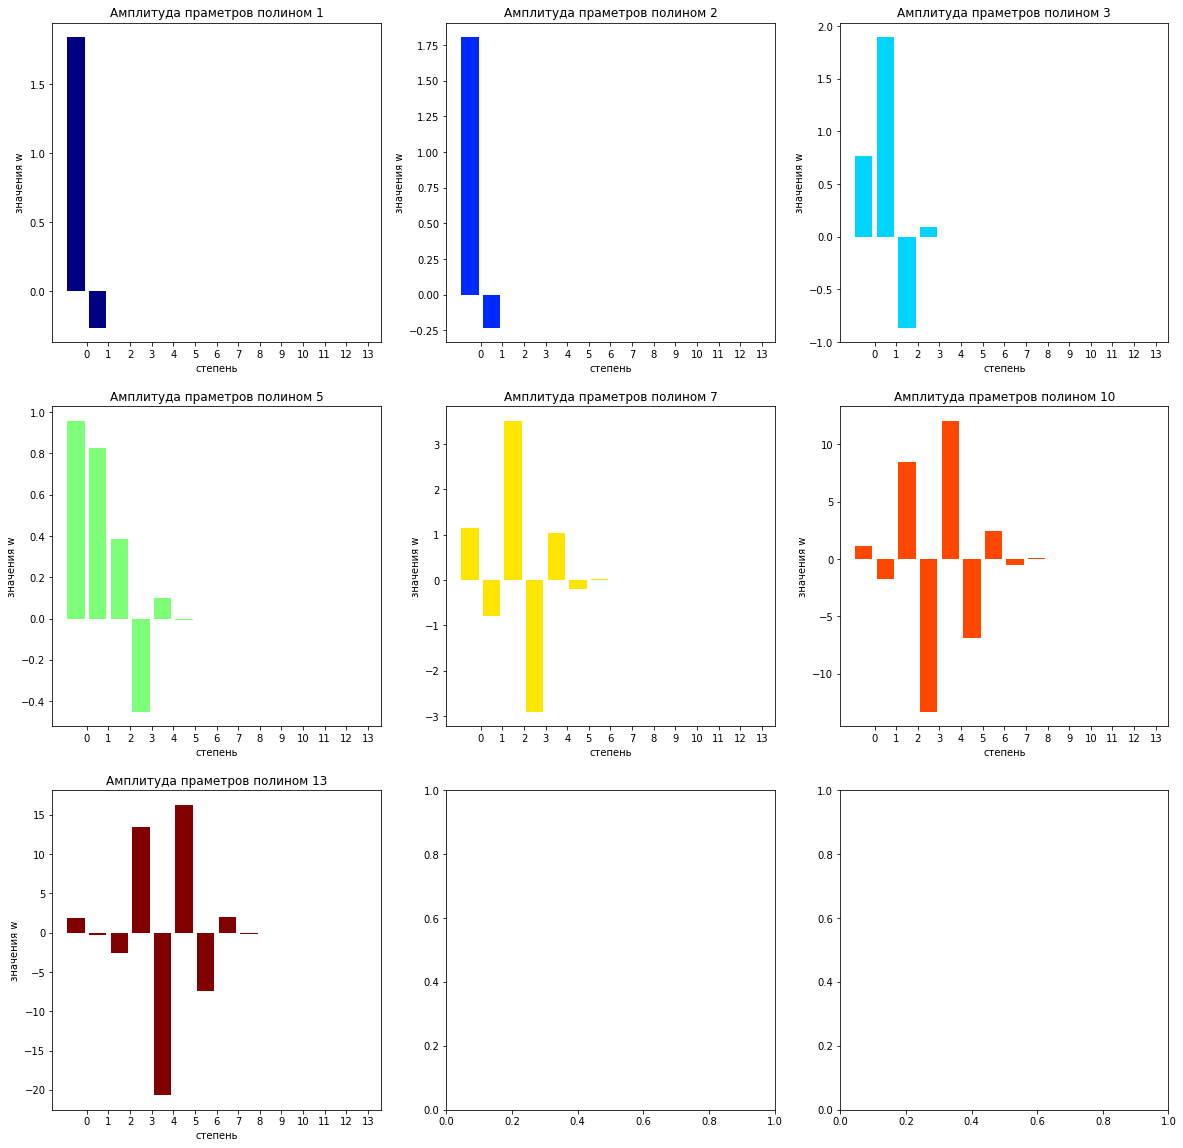

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))

for ix, t, ax in zip(range(len(w_list)), w_list, axes.flatten()):
    degree, w = t
    ax.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    ax.set_title('Амплитуда праметров полином ' + str(degree))
    ax.set_xlabel('степень')
    ax.set_ylabel('значения w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
plt.show()

# Регуляризация




Выкладка из [статьи](https://habr.com/ru/company/ods/blog/323890/): 

Иногда бывают ситуации, когда мы намеренно увеличиваем смещенность модели ради ее стабильности, т.е. ради уменьшения дисперсии модели $Var(\hat{f})$. Одним из условий теоремы Маркова-Гаусса является полный столбцовый ранг матрицы $X$. В противном случае решение МНК $\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$ не существует, т.к. не будет существовать обратная матрица $\left(X^T X\right)^{-1}.$ Другими словами, матрица  будет сингулярна, или **вырожденна**. Такая задача называется некорректно поставленной. Задачу нужно скорректировать, а именно, сделать матрицу $X^TX$ невырожденной, или **регулярной** (именно поэтому этот процесс называется регуляризацией). 

Чаще в данных мы можем наблюдать так называемую мультиколлинеарность — когда два или несколько признаков сильно коррелированы, в матрице $X$ это проявляется в виде "почти" линейной зависимости столбцов. Например, в задаче прогнозирования цены квартиры по ее параметрам "почти" линейная зависимость будет у признаков "площадь с учетом балкона" и "площадь без учета балкона". Формально для таких данных матрица $X^TX$ будет обратима, но из-за мультиколлинеарности у матрицы  некоторые собственные значения будут близки к нулю, а в обратной матрице $X^TX$ появятся экстремально большие собственные значения, т.к. собственные значения обратной матрицы – это $\frac{1}{\lambda_i}$. Итогом такого шатания собственных значений станет нестабильная оценка параметров модели, т.е. добавление нового наблюдения в набор тренировочных данных приведёт к совершенно другому решению. 


In [ ]:
# собственные значения для полинома 13+ степени показывают мультиколлинеарность
np.linalg.eigvals(np.cov(X[:, 1:-1].T))

array([5.80670515e+17, 2.67342850e+13, 7.72166771e+09, 5.93752669e+06,
       1.28453669e+04, 6.63651391e+01, 1.17997536e+00, 1.08368948e-01,
       3.22732220e-02, 2.89642800e-03, 1.26150200e-04, 3.66206758e-07])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


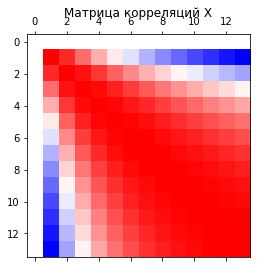

In [ ]:
# Матрицца корреляяций
plt.matshow(np.corrcoef(X.T), cmap=plt.cm.bwr)
plt.title('Матрица корреляций X')
plt.show()

В нашем примере с полиномами 15 степеней:

* Полином 1 mse: 0.2636335747391831
* Полином 2 mse: 0.2563743209549385
* Полином 3 mse: 0.07980198442549251
* Полином 5 mse: 0.07593954732348081
* Полином 7 mse: 0.0758971908833554
* Полином 10 mse: 0.07465037581587149
* Полином 13 mse: 0.12036326592827482
* Полином 15 mse: 0.514263693165043

Значения ошибки начинают возрастать при увеличении порядка что видно по полиномам 13 и 15 степеней. Известно, что обратная матрица существует только для несингулрных матриц, то есть таких, у которых нет линейных зависимостей по строкам (см. iid и исследование на дубликаты) и столбцам (см. корреляцию пирсона df.corr() ).

Проблема возникает при нахождении обратной матрицы $(X^TX)^{-1}$. Если выбрана линейная модель и сильно скоррелироване признаки (например >0.95 по Пирсону) не отброшены, то увидеть линейную зависимость (мультиколлинеарность) можно используя числа обусловленности матрицы. Оценку этого числа для матриц можно получить как отношение **модуля максимального собственного** числа к **минимальному**. 

Наличие **очень больших** или **нулевых** чисел будет говорить о наличии **мультиколлинеарности**. Такая задача называется некорректно поставленной, а матрицы - **слабо обусловленными**. При инвертировании матрицы решения будут иметь большую дисперсию. Для исправления проблемы расходящихся значений можно использовать сингулярное разложение или QR разложение:


Полином 1 mse: 0.3035341682090013
Полином 2 mse: 0.3032903599369738
Полином 3 mse: 0.09290905313517825
Полином 5 mse: 0.08699178495360464
Полином 7 mse: 0.08416222256776465
Полином 10 mse: 0.08358003612330872
Полином 13 mse: 0.08270655447192232
Полином 15 mse: 0.08102358474417332


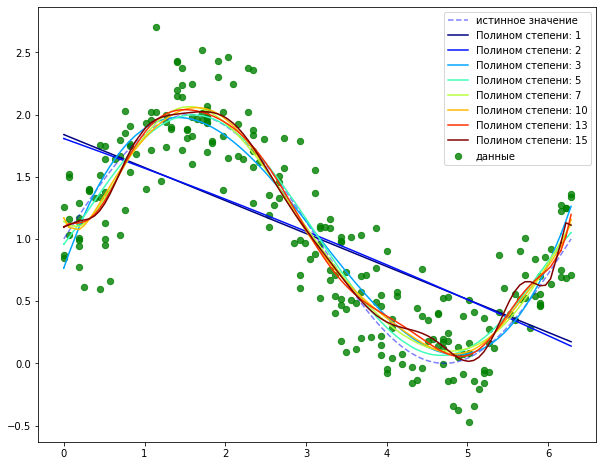

In [ ]:
# список степеней p полиномов, которые тестируются
degree_list = [1, 2, 3, 5, 7, 10, 13, 15]

plt.figure(figsize=(10, 8)) # устанавливаем размер фигуры
cmap = plt.get_cmap('jet') # получаем цветовую палитру для линий
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))] # задает набор разных цветов для линий

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение') # отображаем данные с параметрами
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='данные')

w_list = []
err = []
for ix, degree in enumerate(degree_list): # проходимся по полиномам и строим модель на новых данных
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X) # используем QR разложение
    y_hat = np.dot(np.dot(q, q.T), data['y_train'])    
    err.append(np.mean((data['y_train'] - y_hat)**2))
    
    print(f'Полином {degree} mse:', np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label=f'Полином степени: {degree}')
    plt.legend()

Регуляризация - способ уменьшить сложность модели для предотвращения переобучения или исправить некорректно поставленную задачу. ). Признаком плохой обусловленности является наличие у матрицы собственных значений, близких к нулю. Поэтому один из способов решения проблемы - модифицировать матрицу так, чтобы все её собственные значения λ увеличились на заданное число, а все собственные векторы сохранились (см. регуляризация ковариационной матрицы). Математически добавление априорной информации к loss выглядит следующим образом:

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$

где

$\lambda$ - коэффициент регуляризации, то, насколько сильно мы хотим учитывать условие $R$

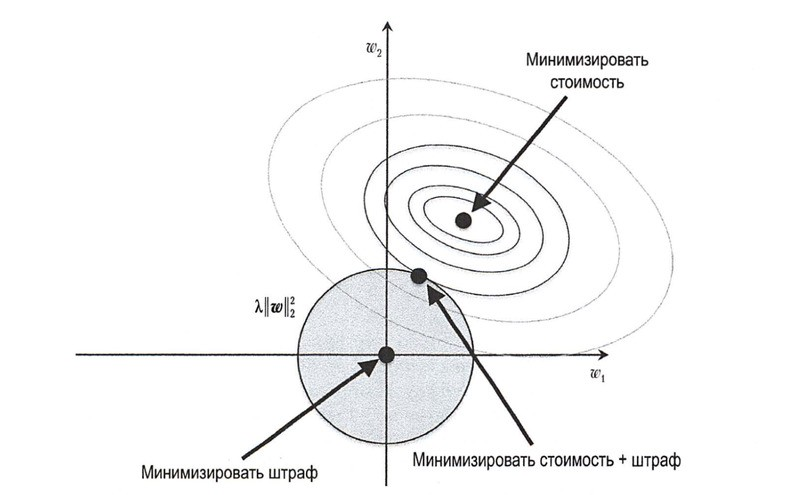

По амплитуде значений значений параметров можно ограничить норму вектора параметров на L2. На изображении показана визуальная интуиция за ограничениями на параметры, накладываемые $w_1$, $w_2$. 


## L2 регуляризация (Ridge)

Давайте оштрафуем за большую норму L2 вектора весов:
$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$
Тогда новая целевая будет иметь вид:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$
Найдем производную ф-ии потерь по $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$
Приравняв к нулю получим:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Где E - единичная диагональная матрица

Такая регрессия называется **гребневой регрессией** (**ridge** regression). А гребнем является диагональная матрица которая прибавляется к матрице $X^T X$ с линейнозависимыми колонками, в результате получаемая матрица не сингулярна. В таком случае число обусловленности будет отношением собственных чисел
$$\frac{e_max + \lambda}{e_min + \lambda}$$
 
Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности, а обусловленность задачи улучшается.
Реазиум на практике:



Полином 1 mse: 0.30374615883289663
Полином 2 mse: 0.30373211210217343
Полином 3 mse: 0.09393208795583095
Полином 5 mse: 0.08707793579378634
Полином 7 mse: 0.0862045380261867
Полином 10 mse: 0.08432647170472074
Полином 13 mse: 0.09217553604364732


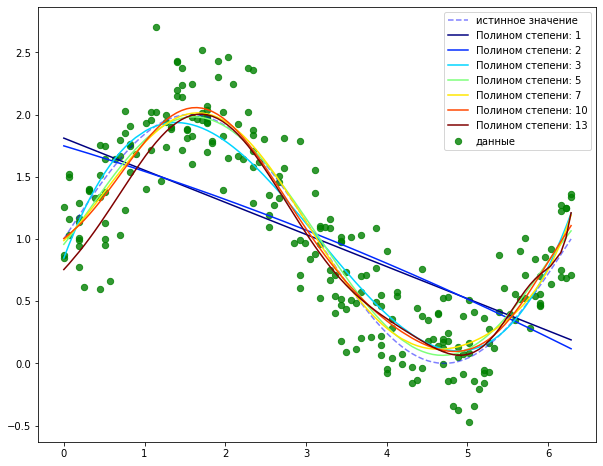

In [ ]:
# список степеней p полиномов, которые тестируются
degree_list = [1, 2, 3, 5, 7, 10, 13]

lmbd = 1 # коэффициент регуляризации

plt.figure(figsize=(10, 8)) # устанавливаем размер фигуры
cmap = plt.get_cmap('jet') # получаем цветовую палитру для линий
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))] # задает набор разных цветов для линий

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение') # отображаем данные с параметрами
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='данные')

w_list = []
err = []
for ix, degree in enumerate(degree_list): # проходимся по полиномам и строим модель на новых данных
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    w_list.append((degree, w))
    print(f'Полином {degree} mse:', np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label=f'Полином степени: {degree}')
    plt.legend()

По графикам видно, что кривые сгладились. На основе валидационной выборки можно подобрать коэффициент  для наилучшей экстраполяции. Можно видеть, что коэффициенты регуляризации сглажены, но переобучение все еще можно наблюдать по метрикам качества:


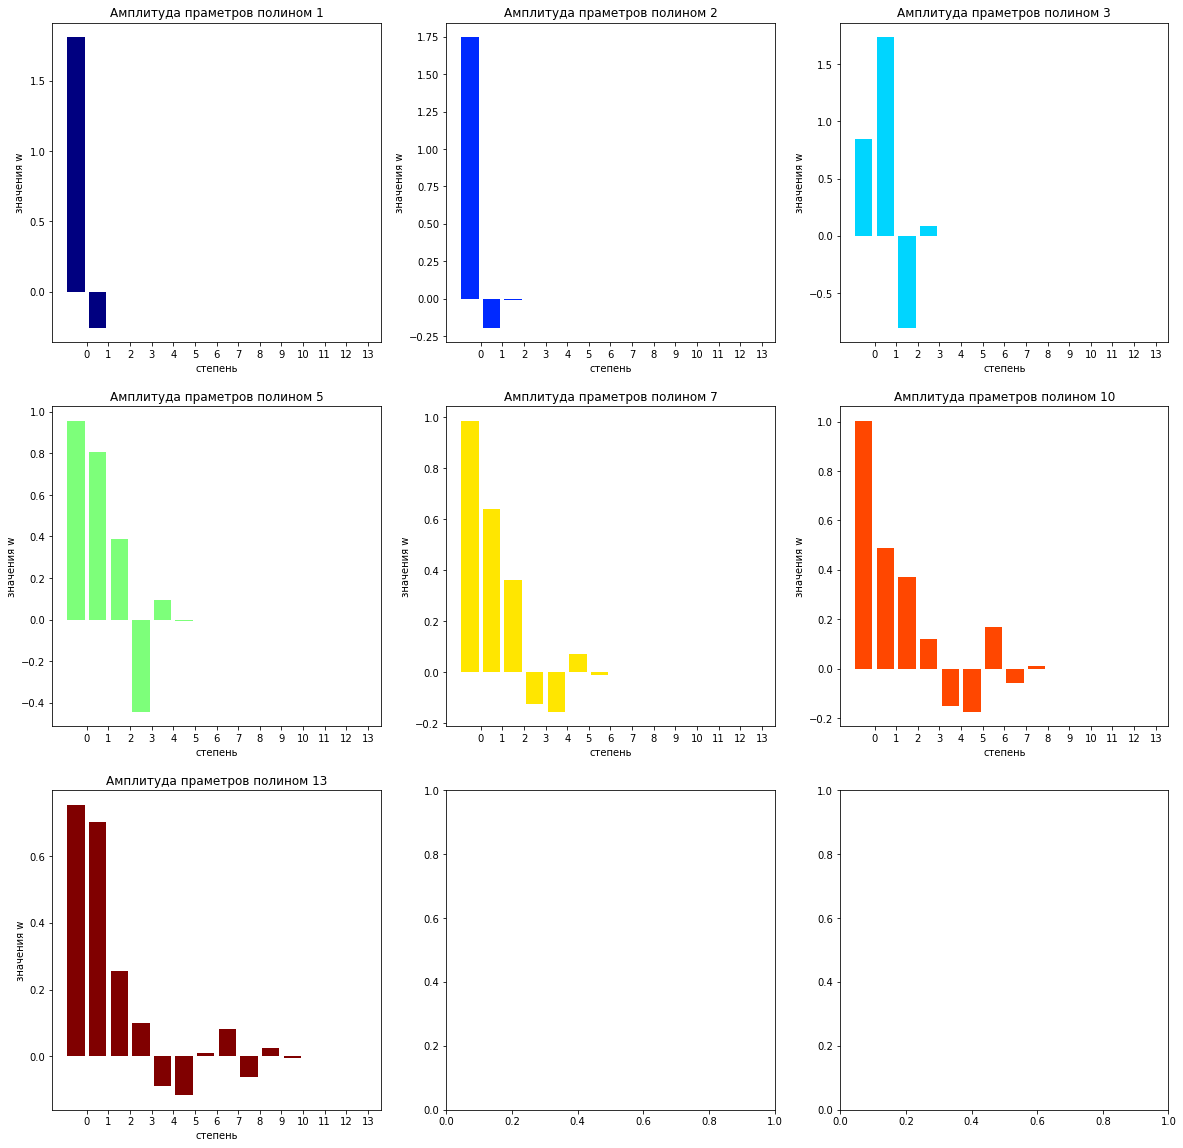

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))

for ix, t, ax in zip(range(len(w_list)), w_list, axes.flatten()):
    degree, w = t
    ax.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    ax.set_title('Амплитуда праметров полином ' + str(degree))
    ax.set_xlabel('степень')
    ax.set_ylabel('значения w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
plt.show()

## L1 регуляризация (Lasso)

По аналогии ограничить вектор параметров можно с помощью L1 нормы:
$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$
В таком случае функция потерь имеет вид:
$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$
Найдя производную по параметрам модели получим:
$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$
Задача не имеет решения в явном виде. Для поиска хорошего приближенного решения используем метод градиентного спуска. 
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ скорость градиентного спуска (learning rate)


Скорость обучения $\alpha$ еще иногда обозначается $\eta$.

Реализуем на практике:

In [ ]:
lmbd = 1 # коэфф регулряизации
degree = 13 # полином 13 степени
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# функция для вычисления среднеквадратичное ошибки
mse = lambda u, v: ((u - v)**2).sum()/u.shape[0]

# начальное приближение размером с пространство признаком
w = np.array([-1.0] * X.shape[1])
# максимальное количество итераций
n_iter = 20
# сделаем скорость обучения очень маленькой, на всякий случай 
lr = 0.00000001
loss = []
for ix in range(n_iter): # ограничение на количество итераций
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print(loss[-1])


5.060291346519061e+41
1.1944686232996822e+64
2.819512147317563e+86
6.655385159394677e+108
1.5709863730160432e+131
3.708272511799409e+153
8.753280905528685e+175
2.0661892125590821e+198
4.87718594681347e+220
1.1512470694943494e+243
2.7174887926618074e+265
6.414561681782227e+287
inf
inf
inf
inf
inf
inf
inf
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


В результате функция потерь взрывается и уходит на бесконечность. Причина в разных масштабах: от небольших чисел у полиномиальных признаков 1-2 степени, до огромных при 12-13 степени. Для того чтобы итеративный процесс сошелся, необходимо либо выбрать экстремально малую скорость обучения, либо каким-то образом нормализовать признаки (стандартизировать - единичное матожидание и единичная дисперсия).


$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$
где j - номер признака, i - точки данных

Тогда новый призак
$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


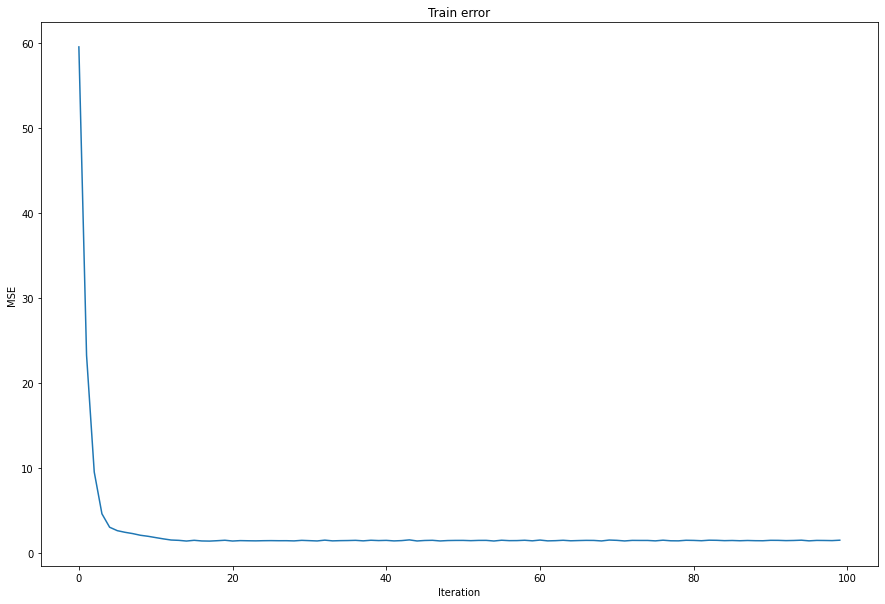

In [ ]:
lmbd = 1 # коэфф регуляризации
degree = 13 # полином 13 степени
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# вычислим выборочное среднее каждого признака
x_mean = X.mean(axis=0)
# вычислим выборочное стандартное отклонение признаков
x_std = X.std(axis=0)
# применим преобразование
X = (X - x_mean)/x_std
X[:, 0] = 1.0 # добавим столбец смещений

# функция для вычисления среднеквадратичное ошибки
mse = lambda u, v: ((u - v)**2).sum()/u.shape[0]

# начальное приближение размером с пространство признаком
w = np.array([-1.0] * X.shape[1])
# максимальное количество итераций
n_iter = 100
# сделаем скорость обучения очень маленькой, на всякий случай 
lr = 0.03 # часто устанавливают с этой константой для небольших моделей
loss = []
for ix in range(n_iter): # ограничение на количество итераций
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Рассмотрим результат применения L1 регуляризации и отобразим полиномы: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid

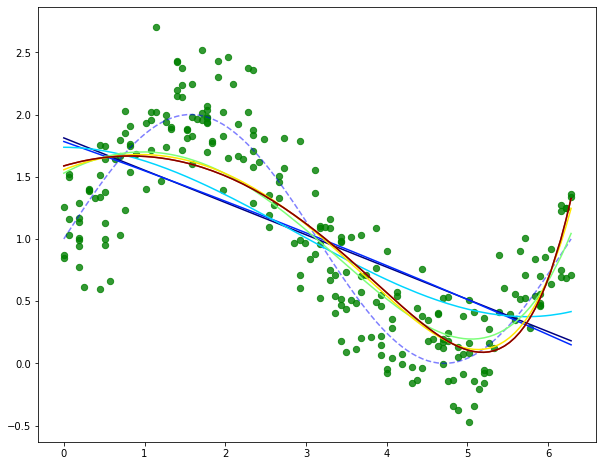

In [ ]:
lmbd = 1 # коэфф регулряизации
degree = 15 # полином 13 степени
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# вычислим выборочное среднее каждого признака
x_mean = X.mean(axis=0)
# вычислим выборочное стандартное отклонение признаков
x_std = X.std(axis=0)
# применим преобразование
X = (X - x_mean)/x_std
X[:, 0] = 1.0 # добавим столбец смещений

margin = 0.3
plt.figure(figsize = (10, 8))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='данные')

# функция для вычисления среднеквадратичное ошибки
mse = lambda u, v: ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=10000, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss


w_list_l1 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=0.01)
    w_list_l1.append((degree, w))
    # print(f'Полином {degree} loss {loss[-1]}')
    plt.plot(data['x_train'], y_hat, color=colors[ix], label=f'Полином степени {degree}')

Визуализировав амплитуду коэффициентов можно видеть, что большая часть нулевая (и значения небольшие). 


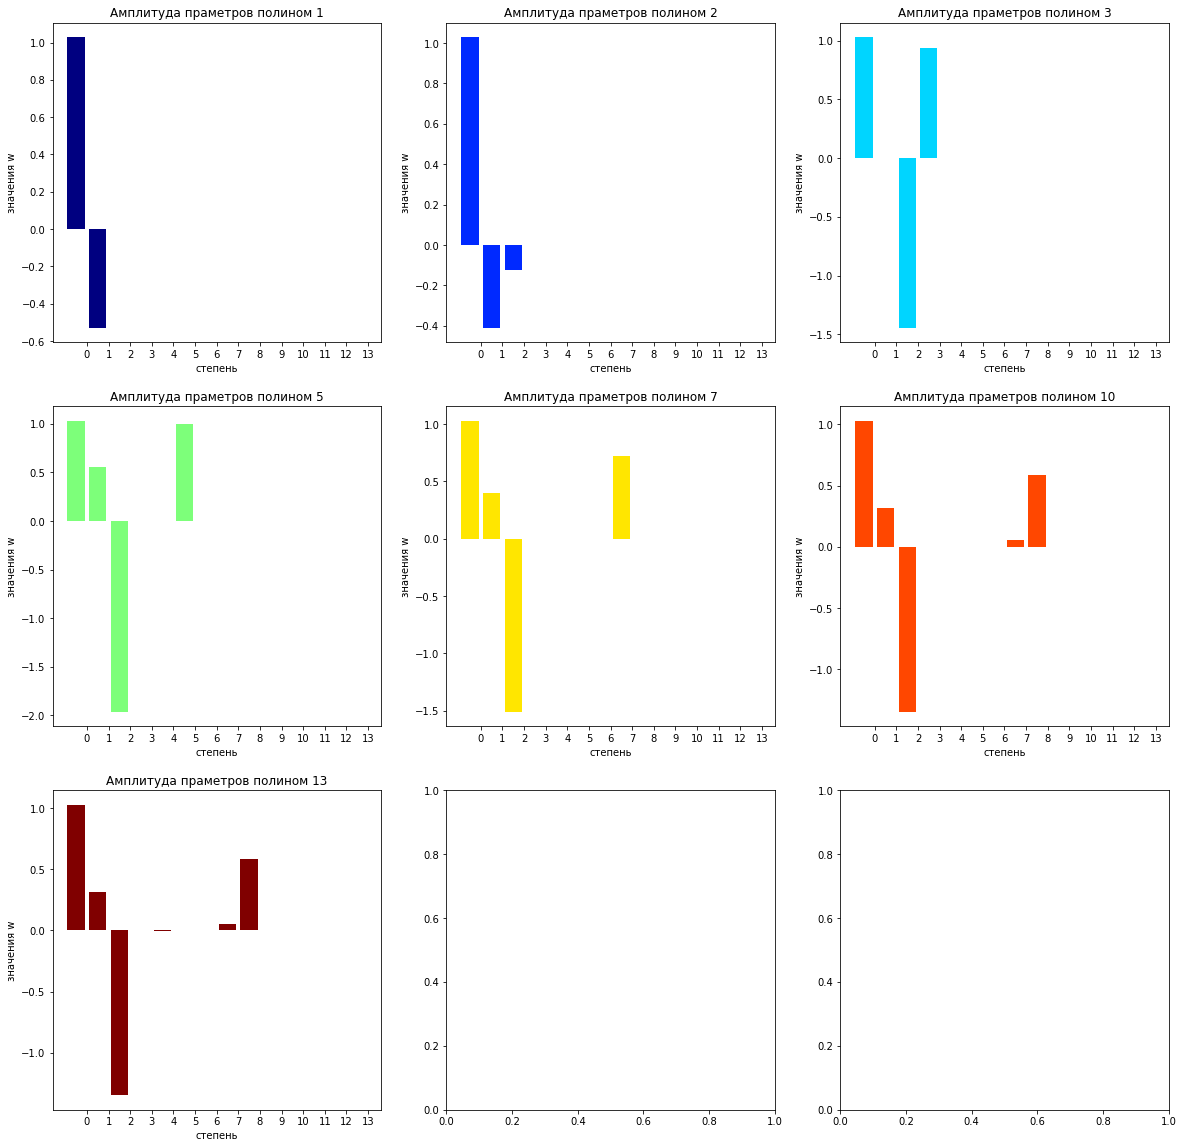

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))

for ix, t, ax in zip(range(len(w_list_l1)), w_list_l1, axes.flatten()):
    degree, w = t
    ax.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    ax.set_title('Амплитуда праметров полином ' + str(degree))
    ax.set_xlabel('степень')
    ax.set_ylabel('значения w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
plt.show()

Описанный способ построения регрессии (L1) называется LASSO регрессия. LASSO = least absolute shrinkage and selection operator.

# Выбор модели

Регуляризованная модель линейной регрессии имеет в качестве параметров не только веса $\large \vec{w}$ , но и хотя бы еще один - гиперпараметр регуляризации $\large \lambda$.
$$\large \Theta = \left\{\vec{w}, \lambda\right\}$$

Более того, мы не можем одновременно настраивать параметры весов и регуляризации. Поэтому обычно разделяют набор данных на три подмножества (или вариации):

* обучающий набор - для подгонки параметров модели
* валидационный - для подбора гиперпараметров
* тестовый (hold out) - для окончательного тестирования модели этот набор не может влиять ни на один из параметров, чтобы сохранить честность оценки потерь теста



Возьмем один реальный набор данных с ценами на жилье в Бостоне http://scikit-learn.org/stable/datasets/.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# загрузим данные
boston = sklearn.datasets.load_boston()
print('Форма набора:', boston.data.shape)
data = {}

ix_test = np.random.choice(range(boston.data.shape[0]), size=200, replace=False)
ix_train = np.setdiff1d(range(boston.data.shape[0]), ix_test)
ix_cols = np.array([0, 2, 4, 5, 6, 7, 10, 11, 12])

# разделим на треин тест
data['x_train'] = boston.data[ix_train, :][:, ix_cols]
data['x_test'] = boston.data[ix_test, :][:, ix_cols]
data['y_train'] = boston.target[ix_train]
data['y_test'] = boston.target[ix_test]

Форма набора: (506, 13)


Рассмотрим признаки:

In [ ]:
import pandas as pd
pd.DataFrame(boston.data[:, ix_cols], columns=boston.feature_names[ix_cols]).head()

,CRIM,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


Для дальнейшего эксперимента будет использована модель эластичной сети (ElasticNet) из пространства линейных моделей, в которой используется выпуклая комбинация L1 и L2 регуляризации, формула для Loss:

$$\displaystyle\min\limits_{w}\frac{1}{2n_{samples}}\lVert X_{w}-Y\rVert_2^2+\alpha\rho\lVert W\rVert_1+\frac{\alpha\lgroup 1-\rho\rgroup}{2}\ \lVert W\rVert_2^2$$

где $\alpha$ - коэффициент регуляризации alpha в api sklearn. $\gamma$- коэффициент l1 регуляризации l1_ratio в api sklearn.


Воспроизведем с помощью Sklearn предобработку и обучим модель:

In [ ]:
from sklearn.linear_model import ElasticNet # elastic
from sklearn.metrics import mean_squared_error # mse
from sklearn.preprocessing import StandardScaler # стандартизация
from sklearn.preprocessing import PolynomialFeatures # полиномиальные признаки
# степень полинома в генерации признаков
degree = 2 
# гиперпараметры ElasticNet
# коэффициент регуляризации эластикнет l2
alpha = 0.01 
# коэффициент регуляризации l1 
l1_ratio = 0.5 
# создаем объект для генерации полиномиальных признаков
pf = PolynomialFeatures(degree=degree, include_bias=False)
# создаем объект sklearn для стандартизации данных
ss = StandardScaler()

# применяем трансформацию к train
X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
print('Форма X_train после добавления полиномиальных признаков:', X_train.shape)
# применяем трансформацию к test
X_test = ss.transform(pf.transform(data['x_test']))

# создаем линейную модель эластикнет с l1 и l2 регуляризациями
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
# обучаем
model = model.fit(X_train, data['y_train'])
# получаем предсказания
# на треин
y_hat_train = model.predict(X_train)
# на тест
y_hat_test = model.predict(X_test)

# смотрим на материки train и test
print('Train mse:', mean_squared_error(data['y_train'], y_hat_train))
print('Test mse|:', mean_squared_error(data['y_test'], y_hat_test))

Форма X_train после добавления полиномиальных признаков: (306, 54)
Train mse: 11.66167471954668
Test mse|: 14.450812462095541


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 969.0432923428616, tolerance: 2.9017789705882358
  positive)


Воспользуемся кросс-валидацией ([k-fold cross-valdation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)) для оценки ошибки на тестовом множестве. Пример 5-folds:

![](https://www.researchgate.net/profile/Mariia-Fedotenkova/publication/311668395/figure/fig5/AS:613923871019041@1523382265447/A-schematic-illustration-of-K-fold-cross-validation-for-K-5-Original-dataset-shown.png)

Значения метрик на валидации усредняются для более стабильных оценок.

In [ ]:
# кросс-валидация
from sklearn.model_selection import KFold

# создадим кросс-валидацию на 5 фолдах, будем перемешивать для большего разнообрация
kf = KFold(n_splits=5, shuffle=True)

# качество модели с кросс-вал на train
mse_train_folds = []
# качество модели с кросс-вал на val
mse_valid_folds = []
# итерируемся по сплитам
for ix_train, ix_valid in kf.split(X_train):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
    # записываем MSE на train 
    mse_train_folds.append(
        mean_squared_error(
            data['y_train'][ix_train], 
            model.predict(X_train[ix_train, :])))
    # записываем MSE на valid
    mse_valid_folds.append(
        mean_squared_error(
            data['y_train'][ix_valid], 
            model.predict(X_train[ix_valid, :])))

# смотрим среднее значение на train val
mse_train_folds = np.mean(mse_train_folds)
mse_valid_folds = np.mean(mse_valid_folds)

# тренируем модель на всем наборе
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
model = model.fit(X_train, data['y_train'])
# создаем предсказания
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('Train mse cross-val:', mse_train_folds)
print('Train mse:', mean_squared_error(data['y_train'], y_hat_train))
print('Valid mse:', mse_valid_folds)
print('Test mse:', mean_squared_error(data['y_test'], y_hat_test))

Train mse cross-val: 11.570254954206455
Train mse: 11.90837193603063
Valid mse: 14.727437031492348
Test mse: 14.272843905186178


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 873.8478816001035, tolerance: 2.4443279508196722
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848.1608761633261, tolerance: 2.433406506122449
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949.7248531881213, tolerance: 2.3861149632653063
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 915.214314

Видно, что ошибка на валирационном множестве является значительно более точной оценкой ошибки на тестовом множестве. Это дает нам возможность сравнивать различные модели не прибегая к использованию тестового множества. Ошибка в дизайне такого эксперимента критична и может стоить всего эксперимента, если допущена в самом начале.

Воспользуемся этой техникой, чтобы найти оптимальную степень полиномиальной регрессии в эластичной сети.


лучший рез на тесте: 14.222778960163897


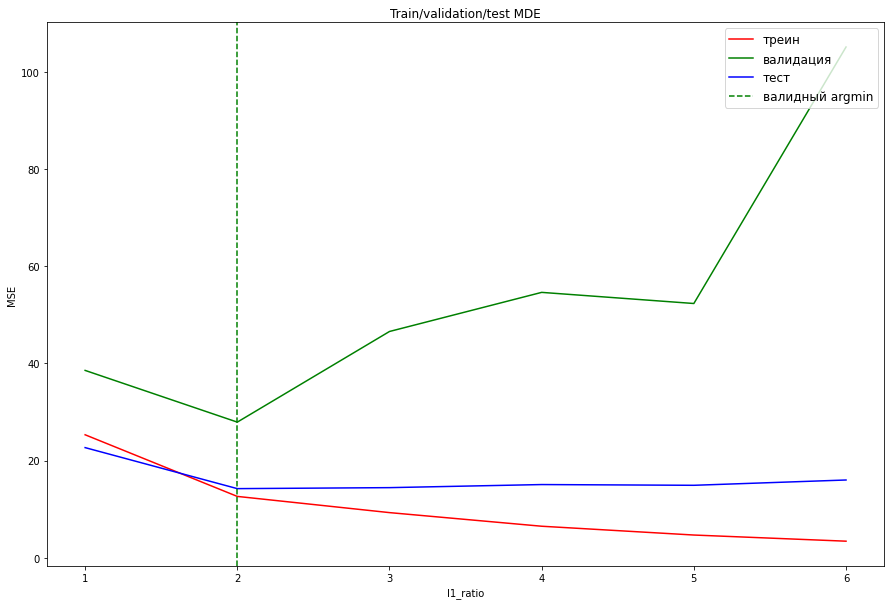

In [ ]:
# прогресс бар
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

l1_ratio = 0.01

kf = KFold(n_splits=5, shuffle=False)

mse_train = []
mse_valid = []
mse_test = []

# итерируемся по параметрам степени полинома
degree_list = range(1, 7)
for degree in tqdm_notebook(degree_list):
    pf = PolynomialFeatures(degree=degree, include_bias=False) # иниц полиномы
    ss = StandardScaler() # иниц стандартизатор
    #добавляем полином и стандартиризуем треин
    X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
    #добавляем полином и стандартиризуем тест
    X_test = ss.transform(pf.transform(data['x_test']))

    mse_valid_folds = []

    # Итериуремся по сплитам
    for ix_train, ix_valid in kf.split(X_train):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
        model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])

        # записываем MSE на valid по каждому фолду
        mse_valid_folds.append(
            mean_squared_error(
                data['y_train'][ix_valid], 
                model.predict(X_train[ix_valid, :])))
        
    #складываем среднюю оценку по всем фолдам по валиду в массив
    mse_valid.append(np.mean(mse_valid_folds))

    # тренируем модель на всем наборе
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train, data['y_train'])

    # записываем MSE на треин
    mse_train.append(mean_squared_error(data['y_train'], model.predict(X_train)))
    # записываем MSE на тесте
    mse_test.append(mean_squared_error(data['y_test'], model.predict(X_test)))
    

print('лучший рез на тесте:', np.min(mse_test))
plt.figure(figsize=(15, 10))
plt.plot(degree_list, mse_train, c='r', label='треин')
plt.plot(degree_list, np.array(mse_valid), c='g', label='валидация')
plt.plot(degree_list, mse_test, c='b', label='тест')

x = sorted(zip(degree_list, mse_valid), key=lambda t: t[1])[0][0]
plt.axvline(x, color='g', linestyle='--', label='валидный argmin')


plt.legend(loc='upper right', prop={'size': 12})
plt.title('Train/validation/test MDE', fontsize=12)
plt.xlabel('l1_ratio')
plt.ylabel('MSE')
plt.show()


Для поиска в параметров в большем пространстве параметров существует несколько вспомогательных классов:

* [Pipeline](http://scikit-learn.org/stable/modules/pipeline.html), который позволяет объединять несколько трансформеров данных и моделей в одну модель; например полиномиальная трансформация стандардизация, обучение модели; новая модель обладает интерфейсом модели, т.н. реализует функции fit и predict (predict_proba);
* [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) сделан для поиска оптимальных параметров (полный перебор в ограниченном пространстве гипотез); этот класс также реализует интерфейс модели; финальная модель может быть обучена на всем тренировочном множестве, используя найденные оптимальные параметры.


In [ ]:
from sklearn.pipeline import Pipeline # конвейер обработки
# конвейерз из 3 шагов
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),
    ('ss', StandardScaler()),
    ('en', ElasticNet())
])
pipe.named_steps

{'en': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'pf': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                    order='C'),
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True)}

Переберем обозначенные параметры с помощью грид-серча:

In [ ]:
parameters = {
    'pf__degree': [1, 2, 3],
    'en__alpha': [0.001, 0.01, 0.02, 0.1, 0.5],
    'en__l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.9, 1]
}

for k, v in parameters.items():
    print(k, v)

pf__degree [1, 2, 3]
en__alpha [0.001, 0.01, 0.02, 0.1, 0.5]
en__l1_ratio [0.001, 0.01, 0.1, 0.5, 0.9, 1]


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# перебираем набор, параметров, кросс-вал по 10 фолдам, нджобс паралелит на все ядра процессора доступные, вербоуз - отображает ход
grid_search = GridSearchCV(pipe, parameters, cv=10, n_jobs=-1, verbose=1)

grid_search = grid_search.fit(data['x_train'], data['y_train'])

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   14.6s finished


In [ ]:
print('Лучшие прамметры:', grid_search.best_params_)
print('Тестовый результат:', mean_squared_error(data['y_test'], grid_search.predict(data['x_test'])))

Лучшие прамметры: {'en__alpha': 0.1, 'en__l1_ratio': 0.9, 'pf__degree': 3}
Тестовый результат: 16.351514387398243
